# **Problem Statement**

Build machine learning models designed to detect fraudulent credit card transactions. This project will involve analyzing a wide range of transaction features and patterns to identify anomalies and suspicious behavior that are indicative of fraud. The goal is to develop a highly accurate detection system capable of distinguishing between legitimate and fraudulent activities, thereby reducing financial losses and enhancing security for credit card users.

# **Requirements**

In [1]:
!pip install opendatasets
!pip install pandas
!pip install sklearn
!pip install seaborn
!pip install matplotlib

# **Data Extraction**

Download the datasets from kaggle(User name and key are required)
Dataset loaded form kaggle
https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023


In [2]:
import opendatasets as od
import pandas
od.download("https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sathvikakopalli
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023


100%|██████████| 143M/143M [00:02<00:00, 54.8MB/s]


**Dataset Description**

The dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

**Key Features:**
*   id: Unique identifier for each transaction
*   V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
*   Amount: The transaction amount
*   Binary label indicating whether the transaction is fraudulent (1) or not (0)


**Load the Dataset from the loaded directory**

In [3]:
import pandas as pd
df=pd.read_csv("/content/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv")
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


# **Data Anaylsis**

In [4]:
df.shape

(568630, 31)

In [5]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [71]:
df["Class"].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

# **Featurization**

Featurization is a technique that helps identify and transform relevant attributes of data into meaningful features for machine learning models. It involves extracting informative patterns and relationships from raw data to enhance the predictive power of models. This process can include operations like feature selection, extraction, scaling, and encoding. Effective featurization techniques are crucial for improving the accuracy and performance of machine learning models in predicting target variables.

**Confusion Matrix**

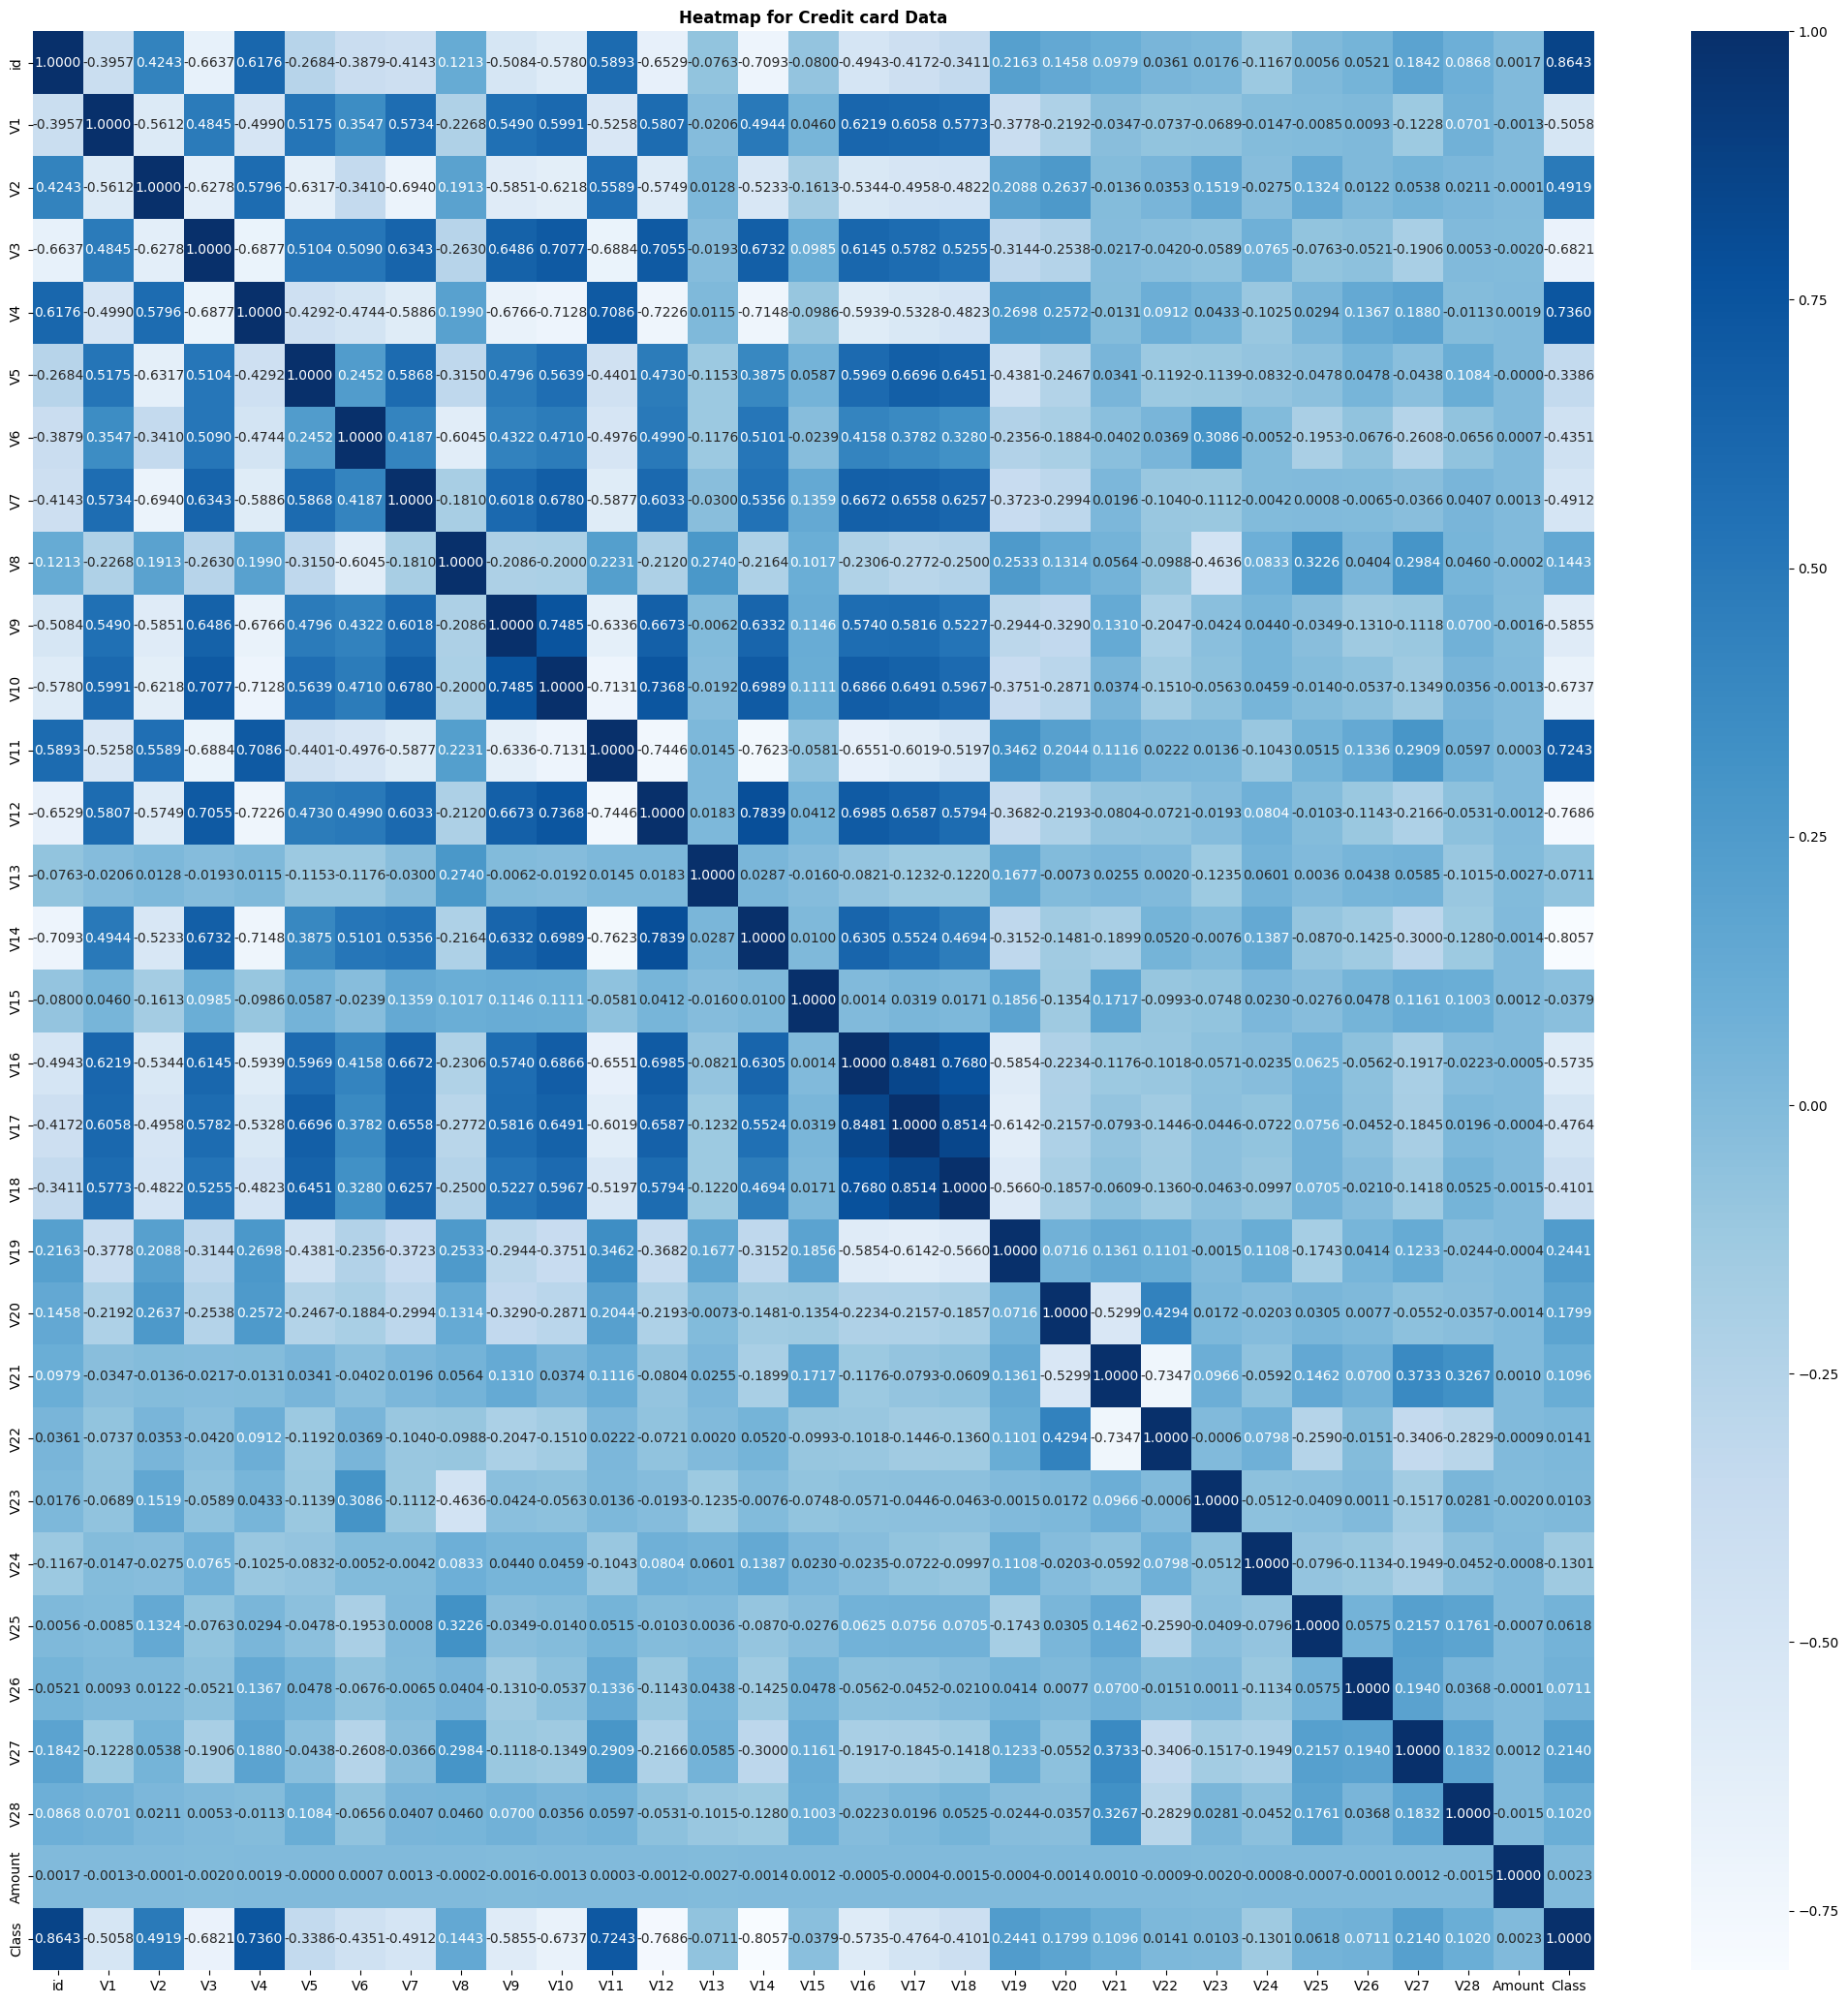

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(26,26))
plt.title("Heatmap for Credit card Data",fontweight='bold')
sns.heatmap(df.corr(),annot=True,fmt=".4f",xticklabels=df.columns,yticklabels=df.columns,cmap="Blues")
plt.show()

In [9]:
input_data=df.drop(columns="Class")
output_data=df["Class"]

**Information Gain**

In [10]:
from sklearn.feature_selection import mutual_info_classif
info_gain_scores=mutual_info_classif(input_data,output_data)
info_gain_scores

array([0.68773537, 0.21039664, 0.28167486, 0.36632355, 0.4209578 ,
       0.17546883, 0.18363995, 0.30347987, 0.15410619, 0.26869434,
       0.451178  , 0.41137122, 0.44016427, 0.02612779, 0.50968894,
       0.02743782, 0.35772072, 0.45919228, 0.22497012, 0.12398651,
       0.11780021, 0.23990851, 0.03423256, 0.06808463, 0.07805982,
       0.04084923, 0.05748926, 0.23195585, 0.17787412, 0.        ])

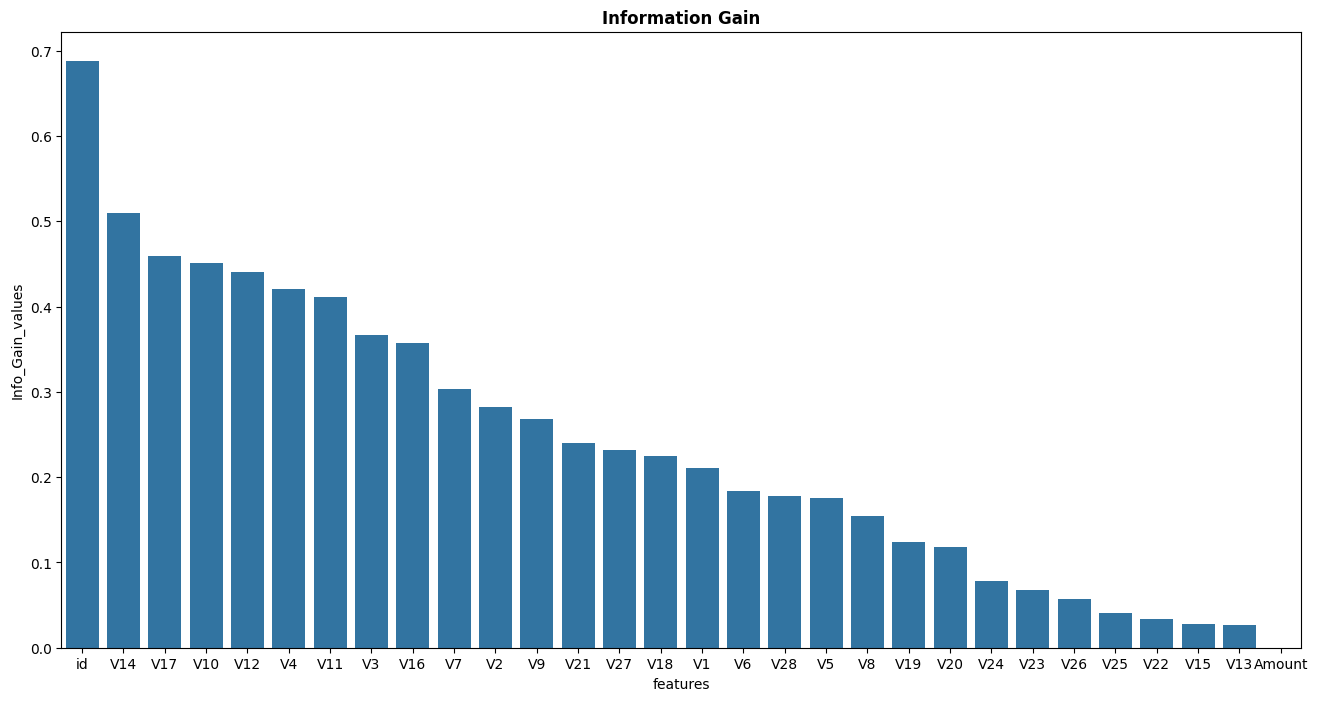

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

infogain_df_scores = pd.DataFrame({'features': df.drop('Class', axis=1).columns, 'Info_Gain_values': info_gain_scores})
infogain_df = infogain_df_scores.sort_values(by=['Info_Gain_values'], ascending=False)

plt.figure(figsize=(16, 8))
plt.title('Information Gain',fontweight='bold')
sns.barplot(x='features', y='Info_Gain_values', data=infogain_df)
plt.show()

**ANOVA**

In [12]:
from sklearn.feature_selection import f_classif
ANOVA_scores=f_classif(input_data,output_data)
ANOVA_scores

(array([1.67878368e+06, 1.95445598e+05, 1.81485443e+05, 4.94733366e+05,
        6.72018034e+05, 7.36546251e+04, 1.32777262e+05, 1.80859604e+05,
        1.20909806e+04, 2.96647149e+05, 4.72480750e+05, 6.27423120e+05,
        8.20689653e+05, 2.88955930e+03, 1.05186970e+06, 8.20040755e+02,
        2.78698598e+05, 1.66921642e+05, 1.14962550e+05, 3.60225127e+04,
        1.90079054e+04, 6.91863322e+03, 1.13037394e+02, 5.98012606e+01,
        9.79131932e+03, 2.18337990e+03, 2.88521817e+03, 2.72912118e+04,
        5.98101458e+03, 2.90647392e+00]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.18784231e-180,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 2.12957335e-026, 1.05106716e-014

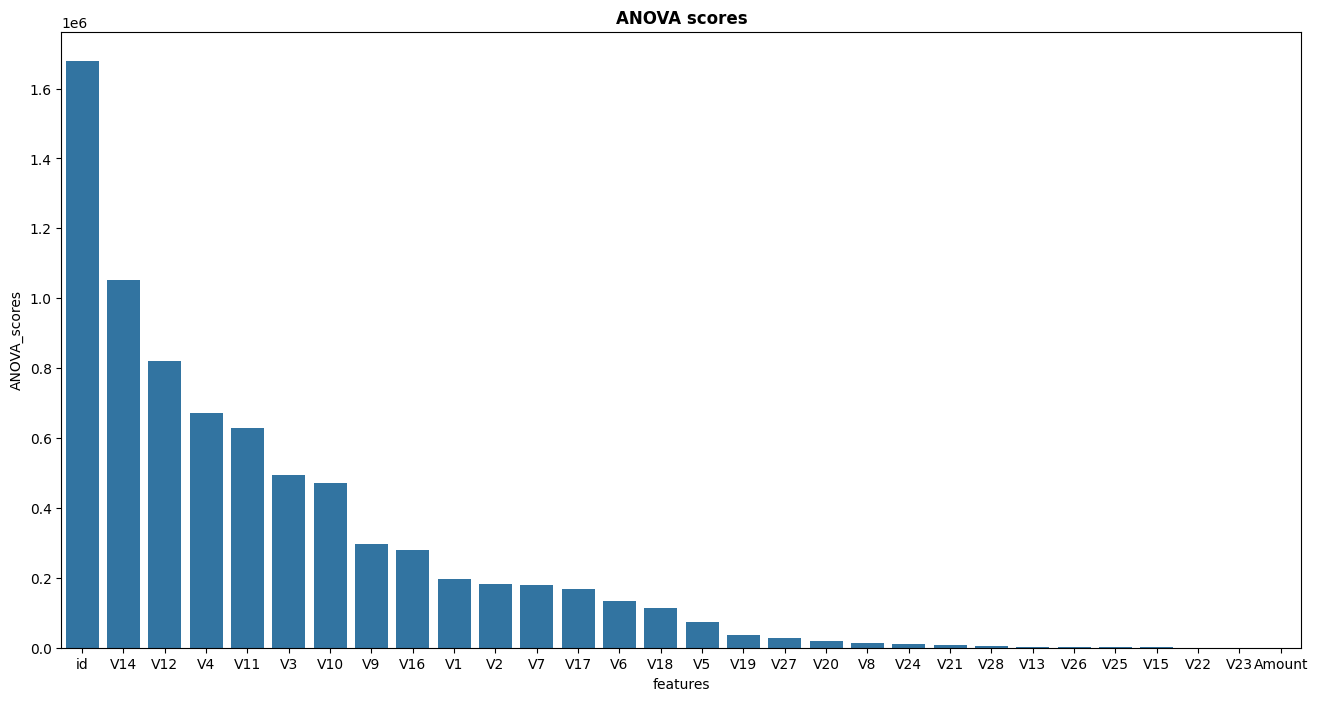

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

ANOVA_df_scores = pd.DataFrame({'features': df.drop('Class', axis=1).columns, 'ANOVA_scores': ANOVA_scores[0]})
ANOVA_df = ANOVA_df_scores.sort_values(by=['ANOVA_scores'], ascending=False)

plt.figure(figsize=(16, 8))
plt.title('ANOVA scores',fontweight='bold')
sns.barplot(x='features', y='ANOVA_scores', data=ANOVA_df)
plt.show()

**Common Features Extraction**

In [14]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
anova_features=ANOVA_df.head(15)["features"].to_list()
anova_features

['id',
 'V14',
 'V12',
 'V4',
 'V11',
 'V3',
 'V10',
 'V9',
 'V16',
 'V1',
 'V2',
 'V7',
 'V17',
 'V6',
 'V18']

In [16]:
infogain_features=infogain_df.head(15)["features"].to_list()
infogain_features

['id',
 'V14',
 'V17',
 'V10',
 'V12',
 'V4',
 'V11',
 'V3',
 'V16',
 'V7',
 'V2',
 'V9',
 'V21',
 'V27',
 'V18']

In [17]:
common_features=list(set(anova_features).intersection(infogain_features))
common_features,len(common_features)

(['V14',
  'V16',
  'V9',
  'V10',
  'V12',
  'id',
  'V11',
  'V18',
  'V17',
  'V3',
  'V2',
  'V7',
  'V4'],
 13)

In [18]:
featured_data=df[common_features]
featured_data

,V14,V16,V9,V10,V12,id,V11,V18,V17,V3,V2,V7,V4
0,0.549020,0.215598,0.727159,0.637735,0.293438,0,-0.987020,0.333644,0.512307,2.496266,-0.469648,0.519014,-0.083724
1,0.627719,0.789188,0.347452,0.529808,1.564246,1,0.140107,0.201799,0.403810,0.558056,-0.356045,0.406466,-0.429654
2,0.616874,-0.577514,-0.261297,0.690708,0.659201,2,-0.272985,0.239442,0.886526,1.728538,-0.949385,0.743511,-0.457986
3,0.559535,-0.030669,-0.205698,0.575231,0.737483,3,-0.752581,2.178616,0.242629,1.746840,-0.508959,0.518269,-1.090178
4,0.241454,0.224538,1.049921,0.968046,1.029577,4,-1.203171,0.291782,0.366466,1.527053,-0.165280,0.658849,-0.448293
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-1.363454,-1.480796,-0.938153,-1.161847,-1.330500,568625,1.430971,-1.376970,-1.520928,-0.899794,0.061886,-0.370393,0.904227
568626,-0.812043,-0.545184,0.483894,-0.210817,-0.539948,568626,0.173590,-0.664313,-0.575991,-0.068129,-0.202896,-0.016935,-0.267328
568627,-0.395126,-0.370201,-0.122048,-0.144495,-0.461849,568627,0.477582,-0.251679,-0.729002,0.137526,-0.004095,-0.070958,-0.035893
568628,-0.390369,0.477402,0.893527,-0.080078,0.335215,568628,-0.324934,0.930280,0.848443,-0.300889,-0.516970,0.580568,-0.144480


**Data Splitting**

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(featured_data,df["Class"],test_size=0.25,random_state=42)
X_train.shape,X_test.shape

((426472, 13), (142158, 13))

# **Modelling**

**Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score
y_pred=lr.predict(X_test)
print("classification report")
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

classification report


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     71023
           1       0.50      1.00      0.67     71135

    accuracy                           0.50    142158
   macro avg       0.25      0.50      0.33    142158
weighted avg       0.25      0.50      0.33    142158

Accuracy: 0.5003939278830597


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


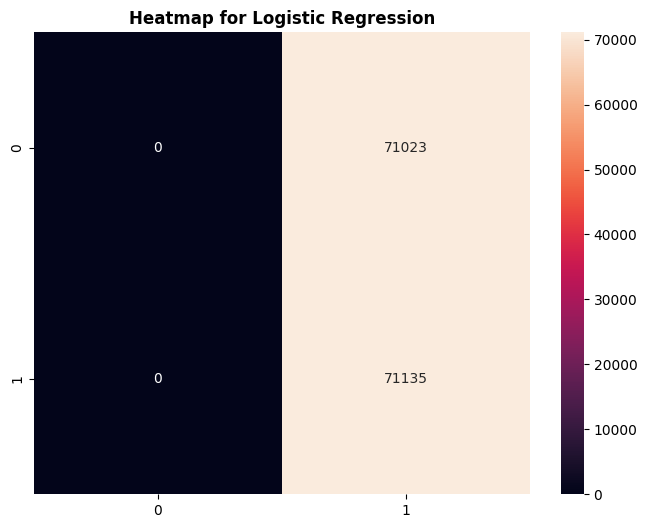

In [78]:
plt.figure(figsize=(8,6))
plt.title("Heatmap for Logistic Regression",fontweight='bold')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")
plt.show()

**Naive Bayes**

In [23]:
from sklearn.naive_bayes import GaussianNB
naive_bayes=GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [24]:
naive_bayes_pred=naive_bayes.predict(X_test)
print("classification report")
print(classification_report(y_test,naive_bayes_pred))
print("Accuracy:",accuracy_score(y_test,naive_bayes_pred))

classification report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     71023
           1       1.00      0.99      1.00     71135

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158

Accuracy: 0.9973128490834142


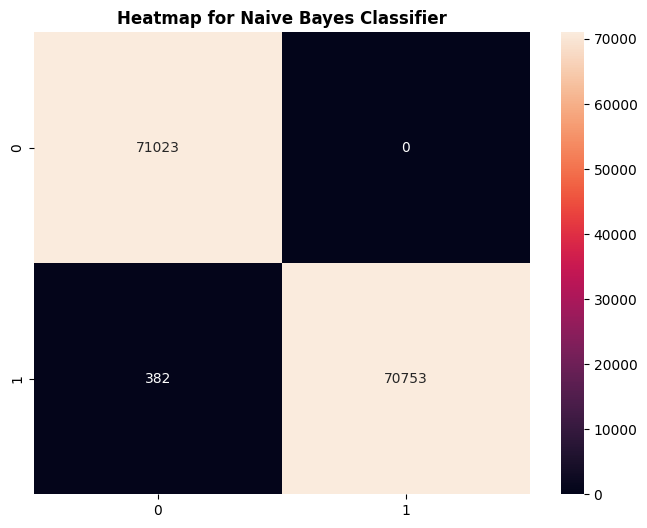

In [79]:
plt.figure(figsize=(8,6))
plt.title("Heatmap for Naive Bayes Classifier",fontweight='bold')
sns.heatmap(confusion_matrix(y_test,naive_bayes_pred),annot=True,fmt="d")
plt.show()

**Random Forest classifier**

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=2)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2)

In [28]:
rf_pred=rf.predict(X_test)
print(classification_report(y_test,rf_pred))
print("Accuracy:",accuracy_score(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71023
           1       1.00      1.00      1.00     71135

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158

Accuracy: 0.9994302114548601


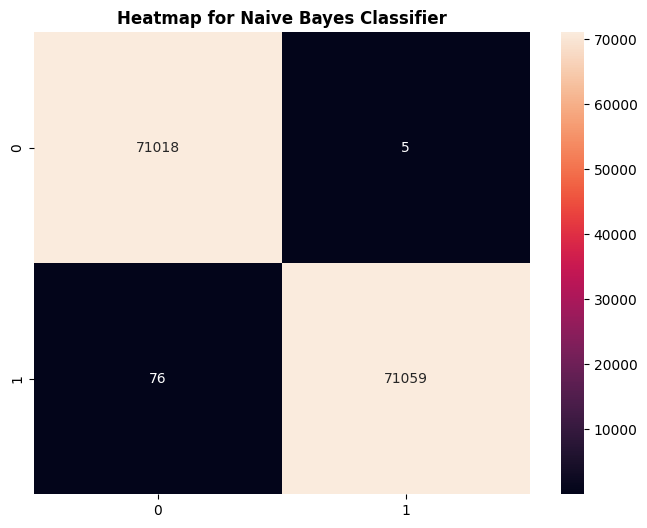

In [80]:
plt.figure(figsize=(8,6))
plt.title("Heatmap for Naive Bayes Classifier",fontweight='bold')
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt="d")
plt.show()

**AdaBoost Classifier**

In [30]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier()
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [31]:
adaboost_pred=adaboost.predict(X_test)
print(classification_report(y_test,adaboost_pred))
print("Accuracy:",accuracy_score(y_test,adaboost_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71023
           1       1.00      1.00      1.00     71135

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158

Accuracy: 0.9997115885141884


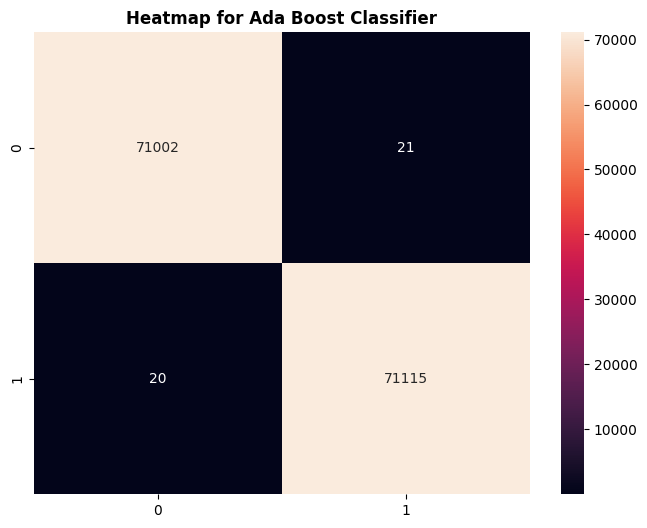

In [81]:
plt.figure(figsize=(8,6))
plt.title("Heatmap for Ada Boost Classifier",fontweight='bold')
sns.heatmap(confusion_matrix(y_test,adaboost_pred),annot=True,fmt="d")
plt.show()

# **Perfomance Analysis**

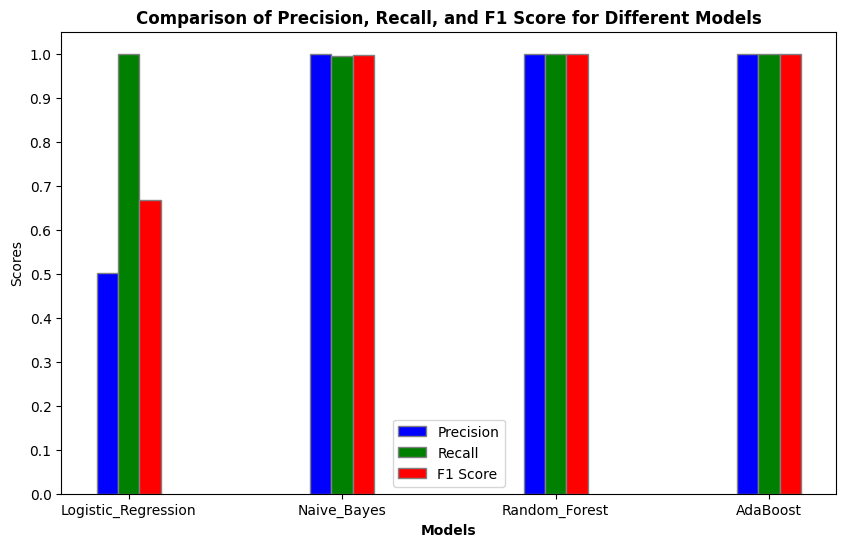

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

model_names = ['Logistic_Regression', 'Naive_Bayes', 'Random_Forest','AdaBoost']
precision = [precision_score(y_test,y_pred),precision_score(y_test,naive_bayes_pred),
             precision_score(y_test,rf_pred),precision_score(y_test,adaboost_pred)]
recall = [recall_score(y_test,y_pred),recall_score(y_test,naive_bayes_pred),
             recall_score(y_test,rf_pred),recall_score(y_test,adaboost_pred)]
f1_score = [f1_score(y_test,y_pred),f1_score(y_test,naive_bayes_pred),
             f1_score(y_test,rf_pred),f1_score(y_test,adaboost_pred)]


bar_width = 0.1
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.figure(figsize=(10, 6))

plt.bar(r1, precision, color='blue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='green', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='red', width=bar_width, edgecolor='grey', label='F1 Score')


plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(model_names))], model_names)


plt.ylabel('Scores')
plt.title('Comparison of Precision, Recall, and F1 Score for Different Models',fontweight='bold')
plt.yticks(np.arange(0, 1.1, 0.1))

plt.legend()


plt.show()

The bar plots indicate that the Random Forest classifier and AdaBoost classifier exhibit superior performance compared to the other models presented.

## **Model saving and loading**

RandomForest

In [59]:
import joblib
with open("credit_card_fraud_prediction_rf.pkl","wb") as f:
  joblib.dump(rf,f)

In [62]:
with open("credit_card_fraud_prediction_rf.pkl","rb") as f:
  rf=joblib.load(f)

In [68]:
print("Actual",y_test.head(1))
print("predicted",rf.predict(X_test.head(1))[0])

Actual 437378    1
Name: Class, dtype: int64
predicted 1


Adaboost

In [61]:
with open("credit_card_fraud_prediction_adaboost.pkl","wb") as f:
  joblib.dump(adaboost,f)

In [69]:
with open("credit_card_fraud_prediction_adaboost.pkl","rb") as f:
  adaboost=joblib.load(f)

In [70]:
print("Actual",y_test.head(1))
print("predicted",adaboost.predict(X_test.head(1))[0])

Actual 437378    1
Name: Class, dtype: int64
predicted 1
